<a href="https://colab.research.google.com/github/qa21336/HousingStatisticsAnalysis-/blob/main/src/populationDataWrangling_mountDrive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADS Data Wrangling for Population Dataset

### Explore the dataset

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

popDf = pd.read_csv("/content/drive/MyDrive/ADS Datasets/MYEB1_detailed_population_estimates_series_UK_(2020_geog21).csv")

# We dont need Local Area name as well as code
popDf = popDf.drop("laname21", axis=1)
popDf.head()

Mounted at /content/drive


,ladcode21,country,sex,age,population_2001,population_2002,population_2003,population_2004,population_2005,population_2006,...,population_2011,population_2012,population_2013,population_2014,population_2015,population_2016,population_2017,population_2018,population_2019,population_2020
0,E06000001,E,1,0,525,502,516,553,531,583,...,601,595,576,551,497,576,507,535,515,517
1,E06000001,E,1,1,544,526,498,526,550,539,...,573,615,601,567,553,512,570,515,532,519
2,E06000001,E,1,2,548,548,551,507,521,539,...,580,586,621,600,576,562,534,576,515,528
3,E06000001,E,1,3,556,546,548,553,508,514,...,600,578,584,625,598,579,565,530,583,520
4,E06000001,E,1,4,606,549,553,540,554,512,...,600,616,593,568,620,604,591,576,533,580


In [2]:
import numpy as np

# Find age range for restructured data
print("youngest age is: "+str(np.min(popDf.loc[:, "age"].to_numpy())))
print("oldest age is: "+str(np.max(popDf.loc[:, "age"].to_numpy())))

youngest age is: 0
oldest age is: 90


### Extract important information from columns and create place for restructured data

In [3]:
# Get countries
countries = np.unique(popDf.loc[:, "country"].to_numpy())

# Get population columns and years
population_cols = list(filter(lambda s: s[0] == "p", popDf.columns))
years = list(map(lambda col: col.split("_")[1], population_cols))

# Create place for restructured data
newPopDict = {}
newPopDict["country"] = []
newPopDict["year"] = []
newPopDict["population"] = []

for sex in ["M", "F"]:
    for i in range(0, 100, 10):
        colName = sex+" age_"+str(i)+"-"+str(i+10)+"_proportion"
        newPopDict[colName] = []

print(newPopDict)

{'country': [], 'year': [], 'population': [], 'M age_0-10_proportion': [], 'M age_10-20_proportion': [], 'M age_20-30_proportion': [], 'M age_30-40_proportion': [], 'M age_40-50_proportion': [], 'M age_50-60_proportion': [], 'M age_60-70_proportion': [], 'M age_70-80_proportion': [], 'M age_80-90_proportion': [], 'M age_90-100_proportion': [], 'F age_0-10_proportion': [], 'F age_10-20_proportion': [], 'F age_20-30_proportion': [], 'F age_30-40_proportion': [], 'F age_40-50_proportion': [], 'F age_50-60_proportion': [], 'F age_60-70_proportion': [], 'F age_70-80_proportion': [], 'F age_80-90_proportion': [], 'F age_90-100_proportion': []}


### Fill in Population Sums

In [4]:
# Extract sum of populations in each year
for country in countries:
    rowsForCountry = popDf.loc[popDf["country"] == country]

    # Get sum for each year
    for year, popCol in zip(years, population_cols):
        # Get total population
        countryYearTotal = np.sum(rowsForCountry.loc[:, popCol].to_numpy())

        # Get age ratios
        rows = rowsForCountry.loc[:, ["age", "sex", popCol]].to_numpy()
        ageBracketToPop = {}
        for row in rows:
            age, sex, pop = row[0], row[1], row[2]
            bracket = str(sex)+" "+str(int(age / 10) * 10)
            if(not(bracket in ageBracketToPop)):
                ageBracketToPop[bracket] = pop
            else:
                ageBracketToPop[bracket] += pop

        # Update newPopDf
        newPopDict["country"].append(country)
        newPopDict["year"].append(year)
        newPopDict["population"].append(countryYearTotal)

        for i in range(0, 100, 10):
            newPopDict["M age_"+str(i)+"-"+str(i+10)+"_proportion"] = ageBracketToPop["1 "+str(i)]
            newPopDict["F age_"+str(i)+"-"+str(i+10)+"_proportion"] = ageBracketToPop["2 "+str(i)]

In [5]:
newPopDf = pd.DataFrame(data=newPopDict)
newPopDf

,country,year,population,M age_0-10_proportion,M age_10-20_proportion,M age_20-30_proportion,M age_30-40_proportion,M age_40-50_proportion,M age_50-60_proportion,M age_60-70_proportion,...,F age_0-10_proportion,F age_10-20_proportion,F age_20-30_proportion,F age_30-40_proportion,F age_40-50_proportion,F age_50-60_proportion,F age_60-70_proportion,F age_70-80_proportion,F age_80-90_proportion,F age_90-100_proportion
0,E,2001,49449746,175899,184524,215332,190308,179259,213519,183229,...,167620,173734,199339,192237,186136,225673,194142,163436,82899,20846
1,E,2002,49679267,175899,184524,215332,190308,179259,213519,183229,...,167620,173734,199339,192237,186136,225673,194142,163436,82899,20846
2,E,2003,49925517,175899,184524,215332,190308,179259,213519,183229,...,167620,173734,199339,192237,186136,225673,194142,163436,82899,20846
3,E,2004,50194600,175899,184524,215332,190308,179259,213519,183229,...,167620,173734,199339,192237,186136,225673,194142,163436,82899,20846
4,E,2005,50606034,175899,184524,215332,190308,179259,213519,183229,...,167620,173734,199339,192237,186136,225673,194142,163436,82899,20846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,W,2016,3113150,175899,184524,215332,190308,179259,213519,183229,...,167620,173734,199339,192237,186136,225673,194142,163436,82899,20846
76,W,2017,3125165,175899,184524,215332,190308,179259,213519,183229,...,167620,173734,199339,192237,186136,225673,194142,163436,82899,20846
77,W,2018,3138631,175899,184524,215332,190308,179259,213519,183229,...,167620,173734,199339,192237,186136,225673,194142,163436,82899,20846
78,W,2019,3152879,175899,184524,215332,190308,179259,213519,183229,...,167620,173734,199339,192237,186136,225673,194142,163436,82899,20846


It seems all age proportions are the same, lets check that

In [6]:
maleProportions = []
maleAgeColNames = list(filter(lambda c: c[0] == "M", newPopDf.columns))
for ageCol in maleAgeColNames:
    uniqueVals = np.unique(newPopDf[ageCol])
    print(uniqueVals)

    maleProportions.append(uniqueVals[0])

print()
femaleProportions = []
femaleAgeColNames = list(filter(lambda c: c[0] == "F", newPopDf.columns))
for ageCol in femaleAgeColNames:
    uniqueVals = np.unique(newPopDf[ageCol])
    print(uniqueVals)

    femaleProportions.append(uniqueVals[0])

[175899]
[184524]
[215332]
[190308]
[179259]
[213519]
[183229]
[149473]
[62067]
[9914]

[167620]
[173734]
[199339]
[192237]
[186136]
[225673]
[194142]
[163436]
[82899]
[20846]


This confirms what I suspected, lets show these proportions in a population pyramid

Text(0.5, 1.0, 'UK Population Pyramid')

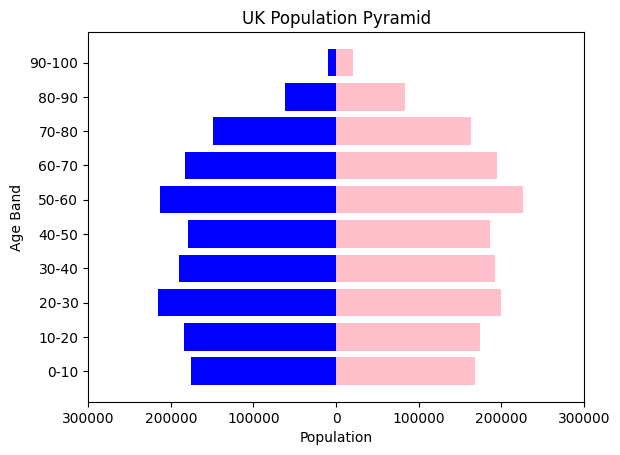

In [7]:
import matplotlib.pyplot as plt

labels = [str(i)+"-"+str(i+10) for i in range(0, 100, 10)]

popPyramidDf = pd.DataFrame(data={"age": labels, "male_pop": maleProportions, "female_pop": femaleProportions})
popPyramidDf["female_left"] = 0
popPyramidDf["female_width"] = popPyramidDf["female_pop"]
popPyramidDf["male_left"] = -popPyramidDf["male_pop"]
popPyramidDf["male_width"] = popPyramidDf["male_pop"]

plt.barh(y=popPyramidDf["age"], width=popPyramidDf["female_width"], label="Female", color="pink")
plt.barh(y=popPyramidDf["age"], width=popPyramidDf["male_width"], left=popPyramidDf["male_left"], label="Male", color="blue")
plt.xticks(range(-300000, 400000, 100000), [str(abs(i)) for i in range(-300000, 400000, 100000)])
plt.ylabel("Age Band")
plt.xlabel("Population")
plt.title("UK Population Pyramid")

Now lets show population change over the years from 2001

Text(0, 0.5, 'Population')

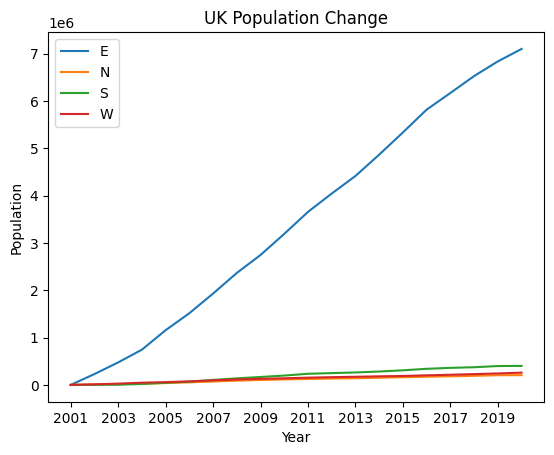

In [8]:
for country in countries:
    countryDf = newPopDf.loc[newPopDf["country"] == country]
    countryPopulations = np.array(countryDf["population"])
    countryPopChange = countryPopulations - countryPopulations[0]

    plt.plot(years, countryPopChange, label=country)
plt.xticks([i for i in range(0, 20, 2)])
plt.legend()
plt.title("UK Population Change")
plt.xlabel("Year")
plt.ylabel("Population")

And again excluding england

Text(0, 0.5, 'Population')

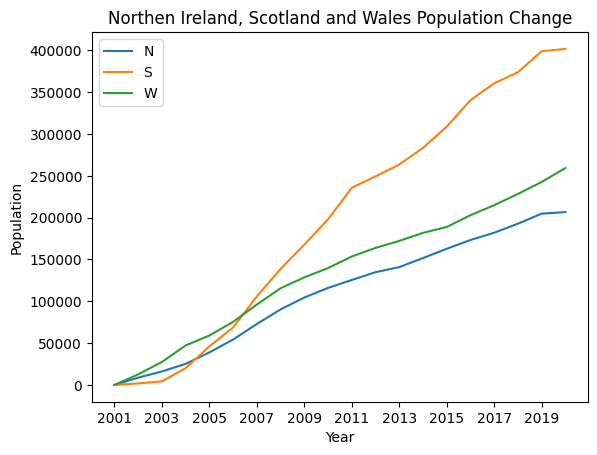

In [9]:
for country in ['N', 'S', 'W']:
    countryDf = newPopDf.loc[newPopDf["country"] == country]
    countryPopulations = np.array(countryDf["population"])
    countryPopChange = countryPopulations - countryPopulations[0]

    plt.plot(years, countryPopChange, label=country)
plt.xticks([i for i in range(0, 20, 2)])
plt.legend()
plt.title("Northen Ireland, Scotland and Wales Population Change")
plt.xlabel("Year")
plt.ylabel("Population")